# Diabetes Data Exploration

## Imports and Setups

In [1]:
%load_ext autoreload
%autoreload 2

# This sets up the appropriate logging and path configs
from notebook_setup import * 

In [2]:
# External Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Import Diabetes Dataset

In [3]:
data = pd.read_csv('data/raw/diabetes.csv')
data.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
0            6      148             72             35        0  33.6  \
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

## Explore Data

### Raw DF Exploration

In [4]:
data.shape

(768, 9)

In [5]:
data.drop_duplicates()
data.shape

(768, 9)

In [6]:
data.describe().transpose()

count        mean         std     min       25%   
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000  \
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Raw DF Correlations

<Axes: >

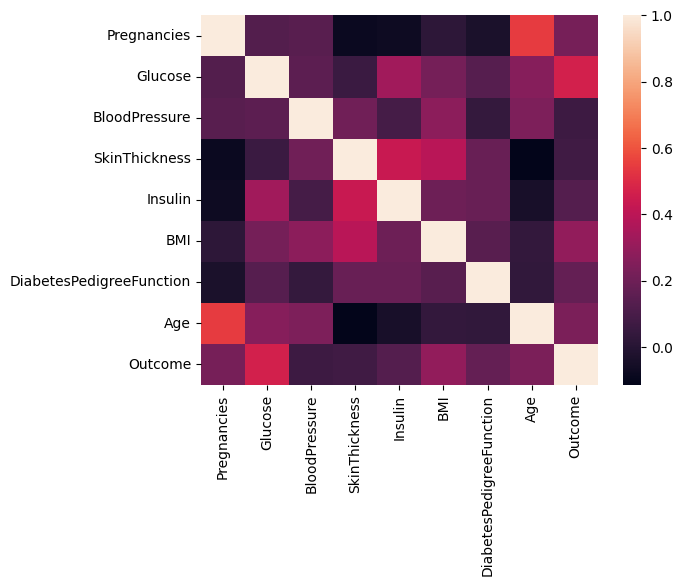

In [9]:
sns.heatmap(data.corr())

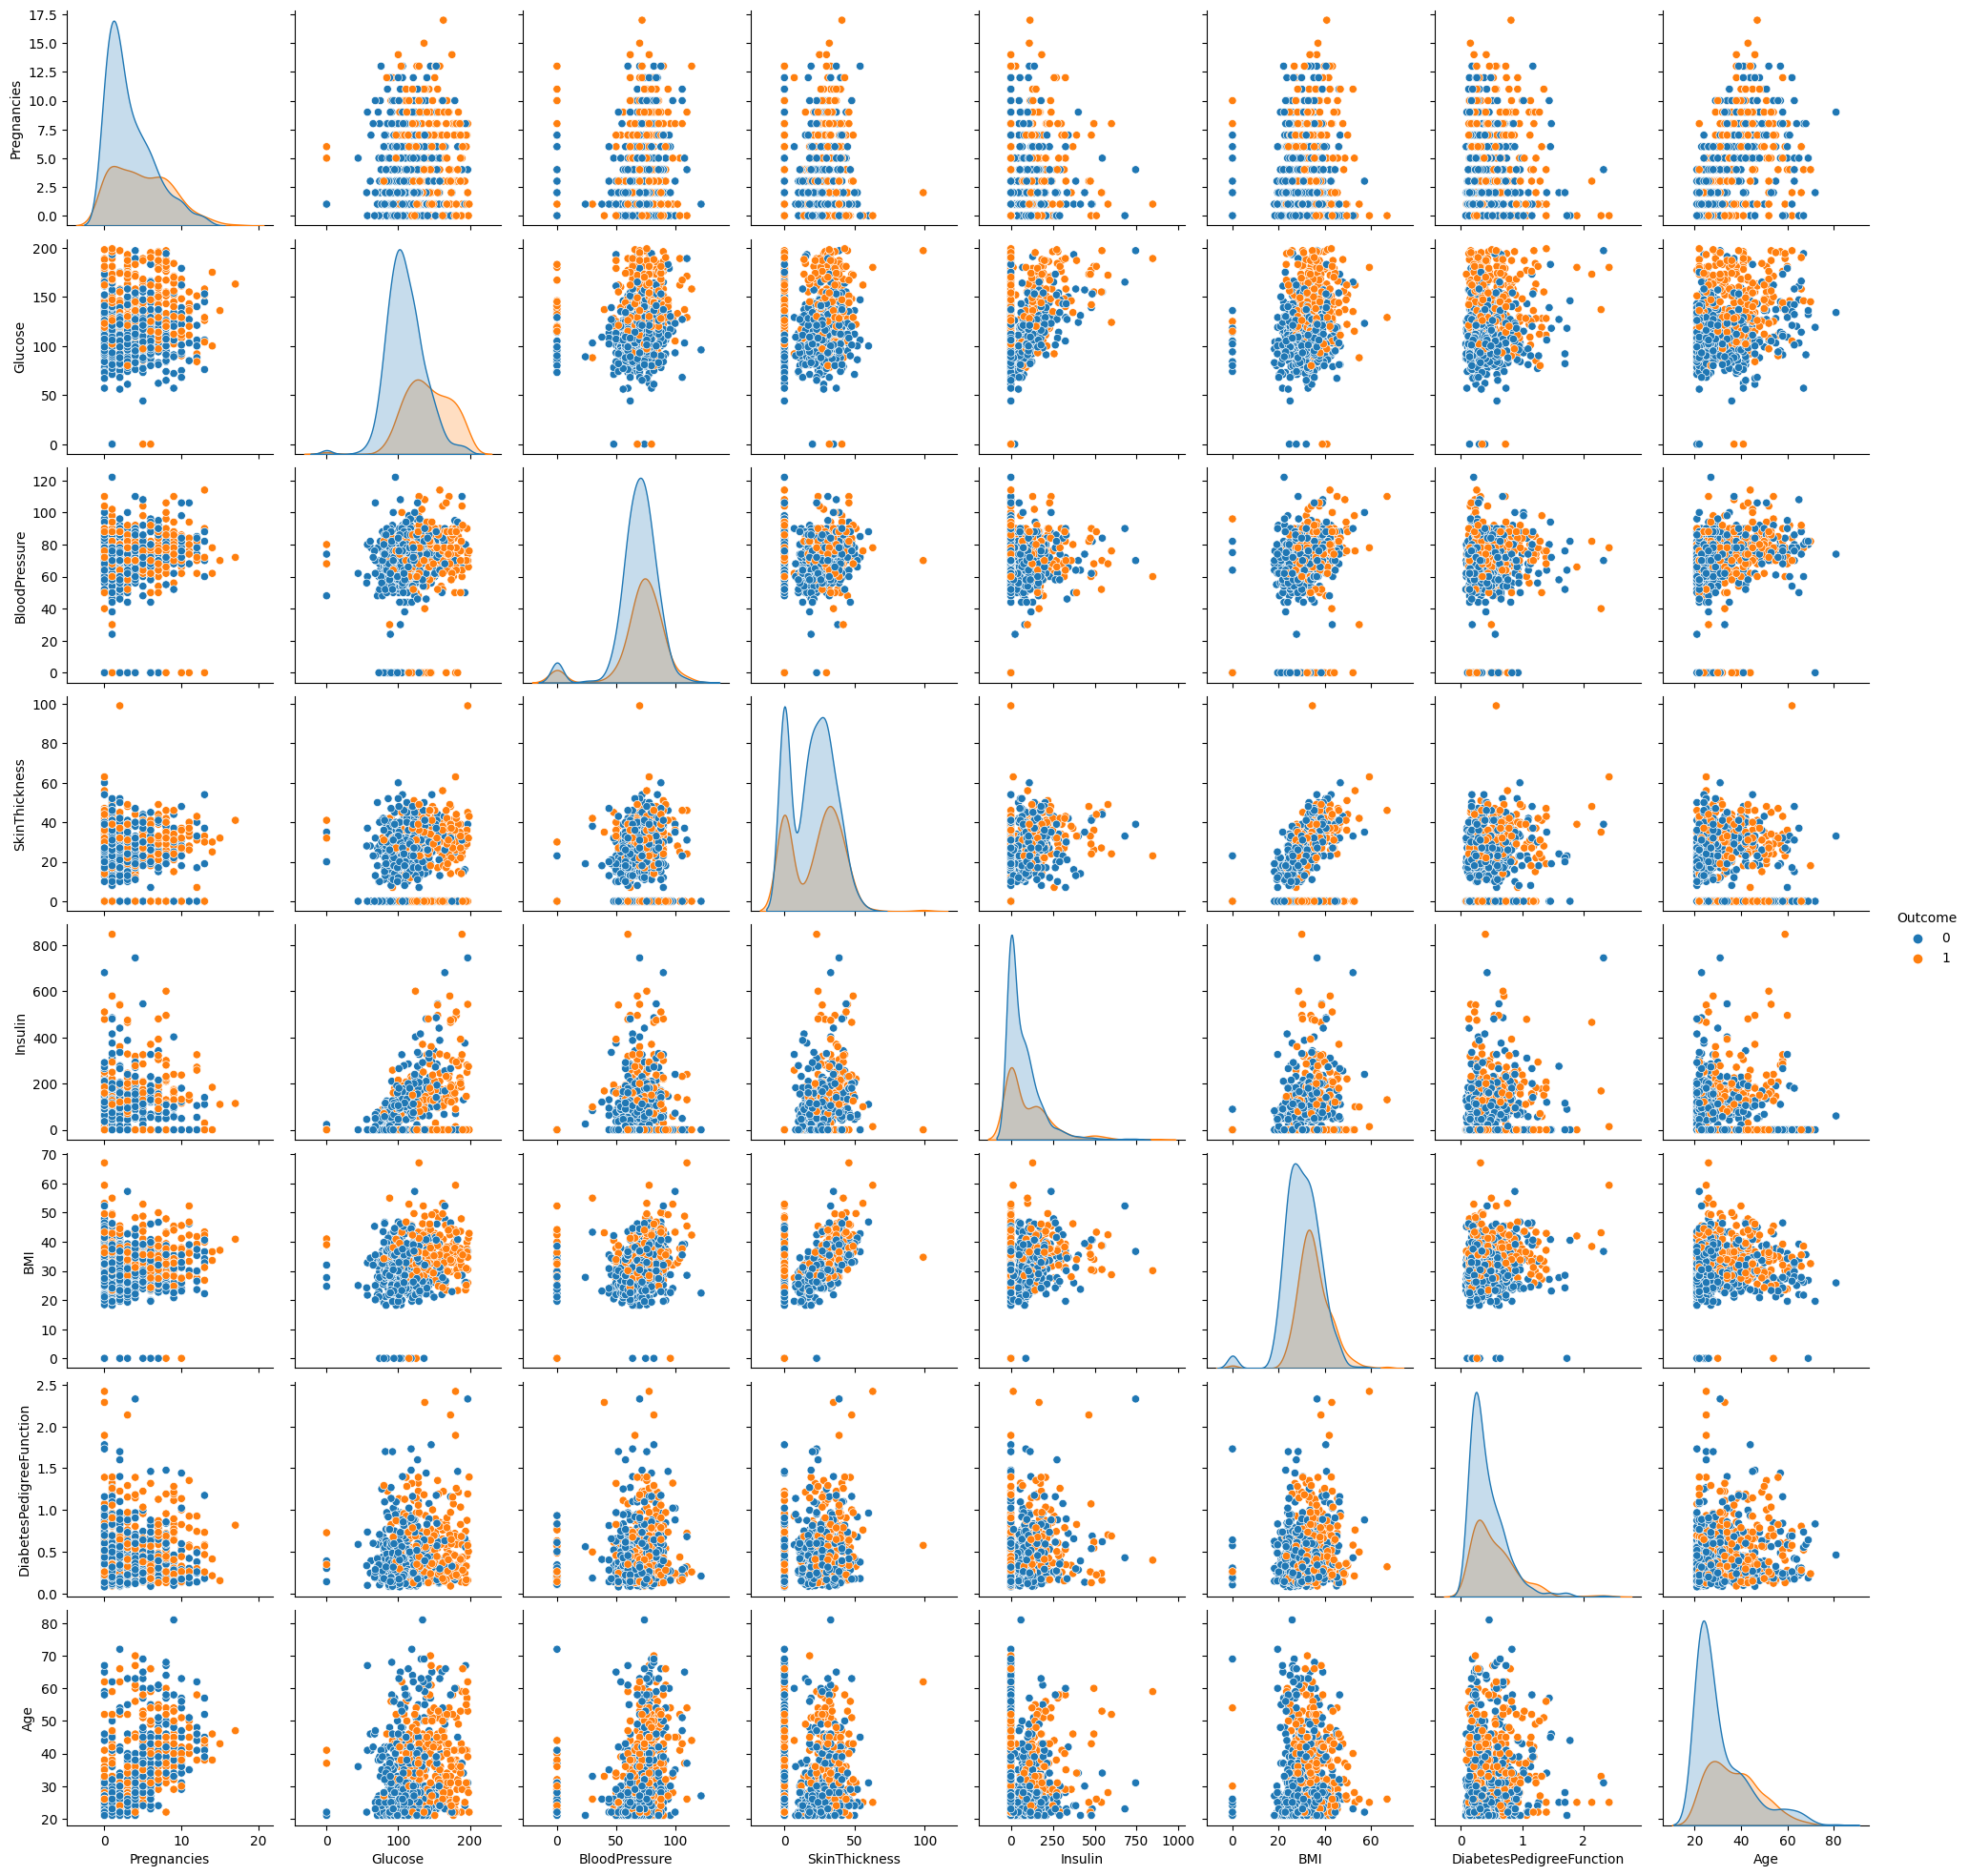

In [10]:
sns.pairplot(data, hue='Outcome')

### Do some initial EDA processing
Raw data does not have nulls, but visualisation indicates we have invalid/outliers. So we have to deal with this. 

In [11]:
data.columns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
# Lets first just visualise all the raw valid datas
features_to_exclude_for_pprocessing = ['Pregnancies']
features_columns = [item for item in data.columns if item.lower() != 'outcome']
process_zeros_columns = [item for item in features_columns if item not in features_to_exclude_for_pprocessing]

In [13]:
data2 = data.loc[(data[features_columns].T != 0).all()]

In [14]:
for column in data2.columns:
    # Check zero values
    print(f'{column}: \nMin:{data2[column].min()} \tMax:{data2[column].max()}\n')

Pregnancies: 
Min:1 	Max:17

Glucose: 
Min:56 	Max:197

BloodPressure: 
Min:24 	Max:110

SkinThickness: 
Min:7 	Max:52

Insulin: 
Min:15 	Max:846

BMI: 
Min:18.2 	Max:57.3

DiabetesPedigreeFunction: 
Min:0.085 	Max:2.329

Age: 
Min:21 	Max:81

Outcome: 
Min:0 	Max:1



In [15]:
len(data2.loc[data['SkinThickness'] == 0])

0

In [16]:
# Check zeros per column
for column in data.columns:
    zero_count = len(data2.loc[data[column] == 0])
    print(f'{column} zero count: {zero_count}')

Pregnancies zero count: 0
Glucose zero count: 0
BloodPressure zero count: 0
SkinThickness zero count: 0
Insulin zero count: 0
BMI zero count: 0
DiabetesPedigreeFunction zero count: 0
Age zero count: 0
Outcome zero count: 225


<Axes: >

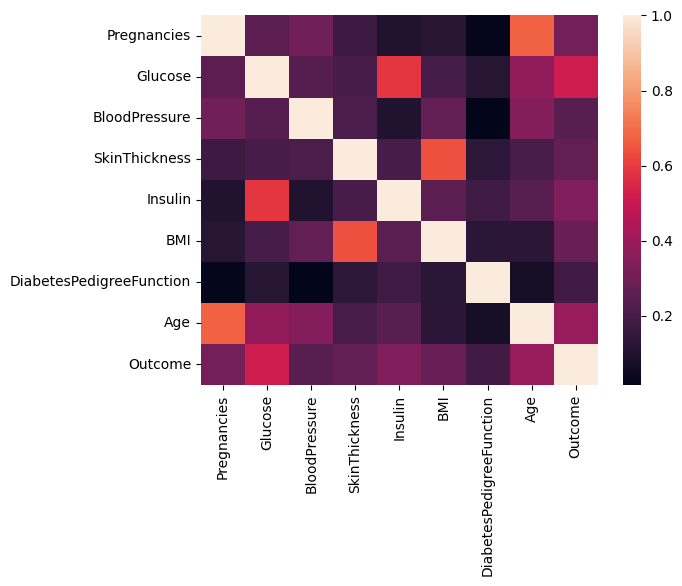

In [17]:
sns.heatmap(data2.corr())

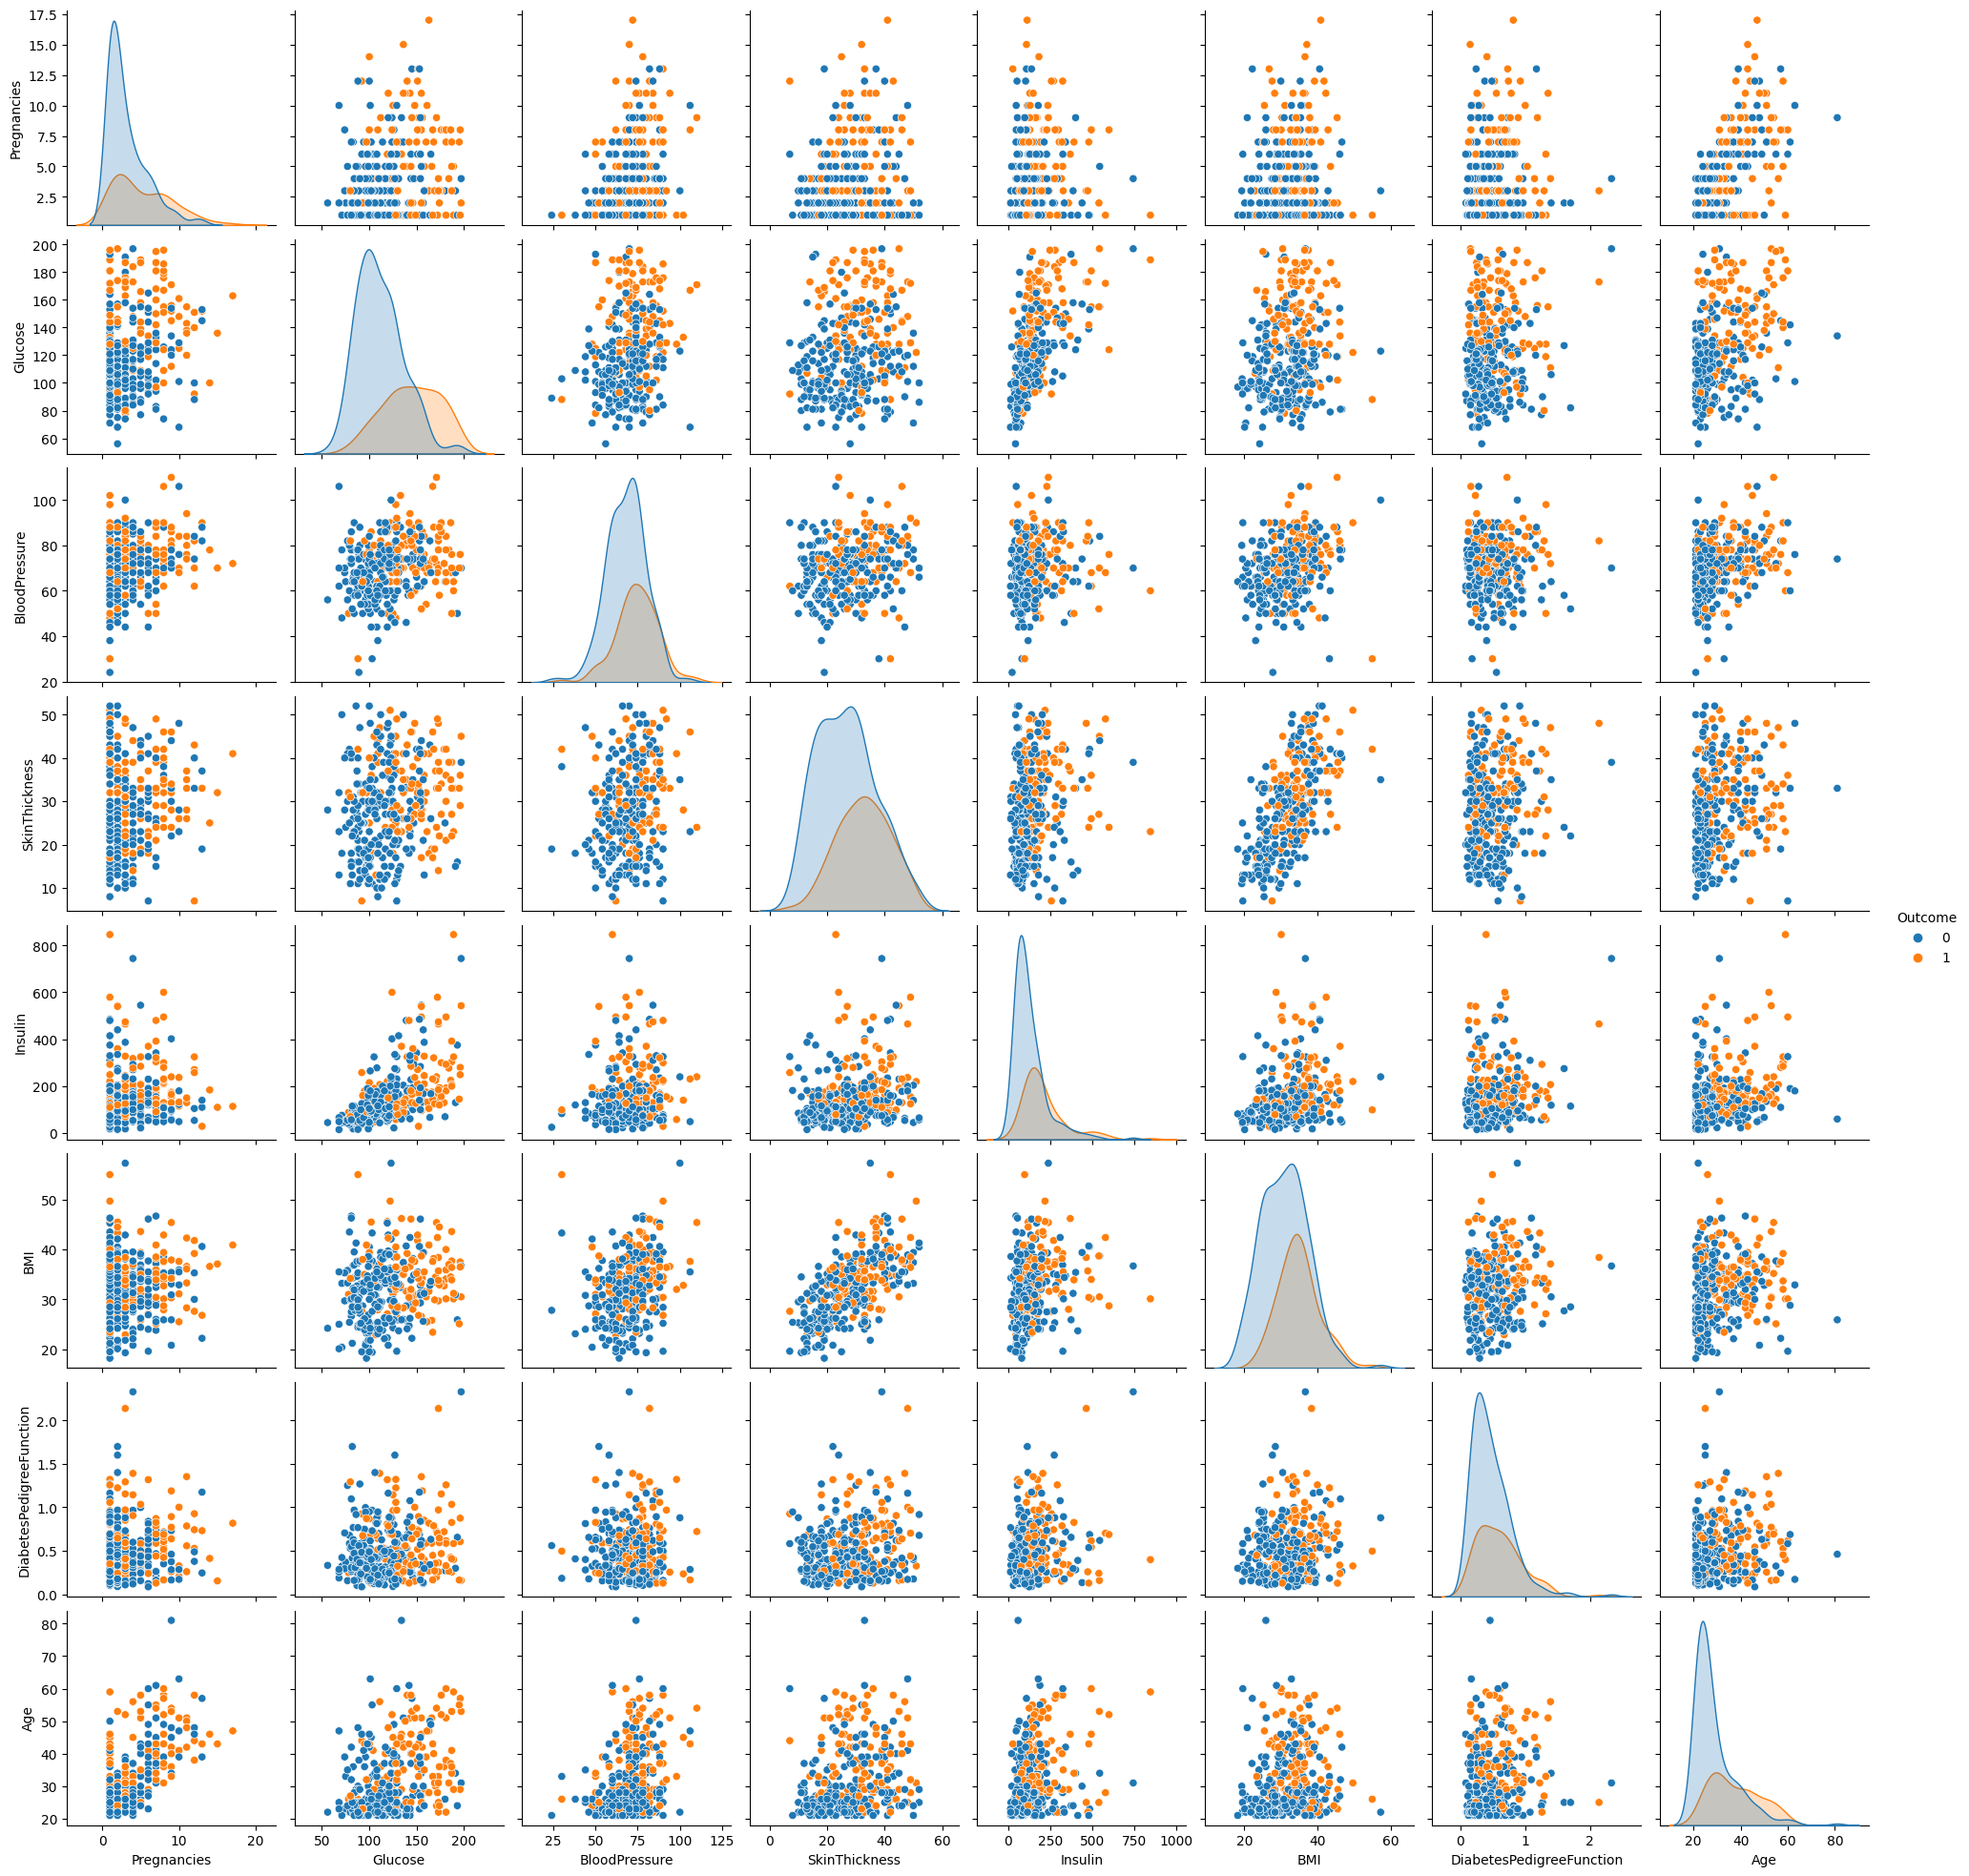

In [18]:
sns.pairplot(data2, hue='Outcome')

### Replace non-valid zeros with average

In [19]:
data[process_zeros_columns] = data[process_zeros_columns].replace(0, np.NaN)
data[process_zeros_columns] = data[process_zeros_columns].fillna(data[process_zeros_columns].mean())

In [20]:
data.shape

(768, 9)

<Axes: >

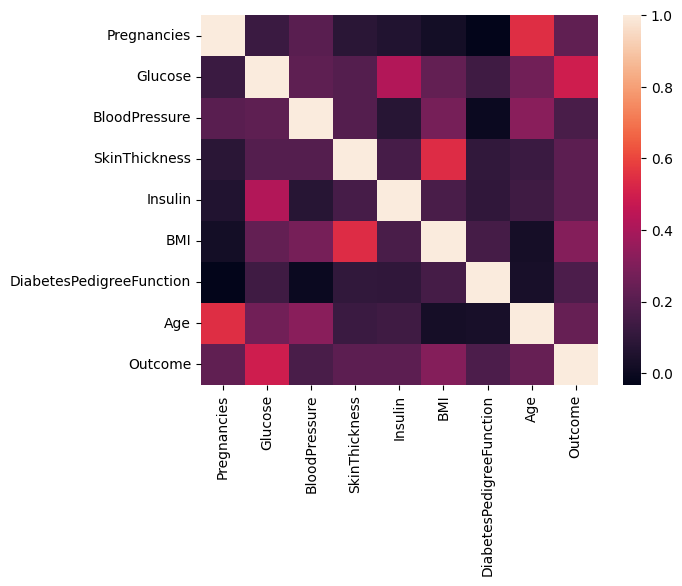

In [21]:
sns.heatmap(data.corr())

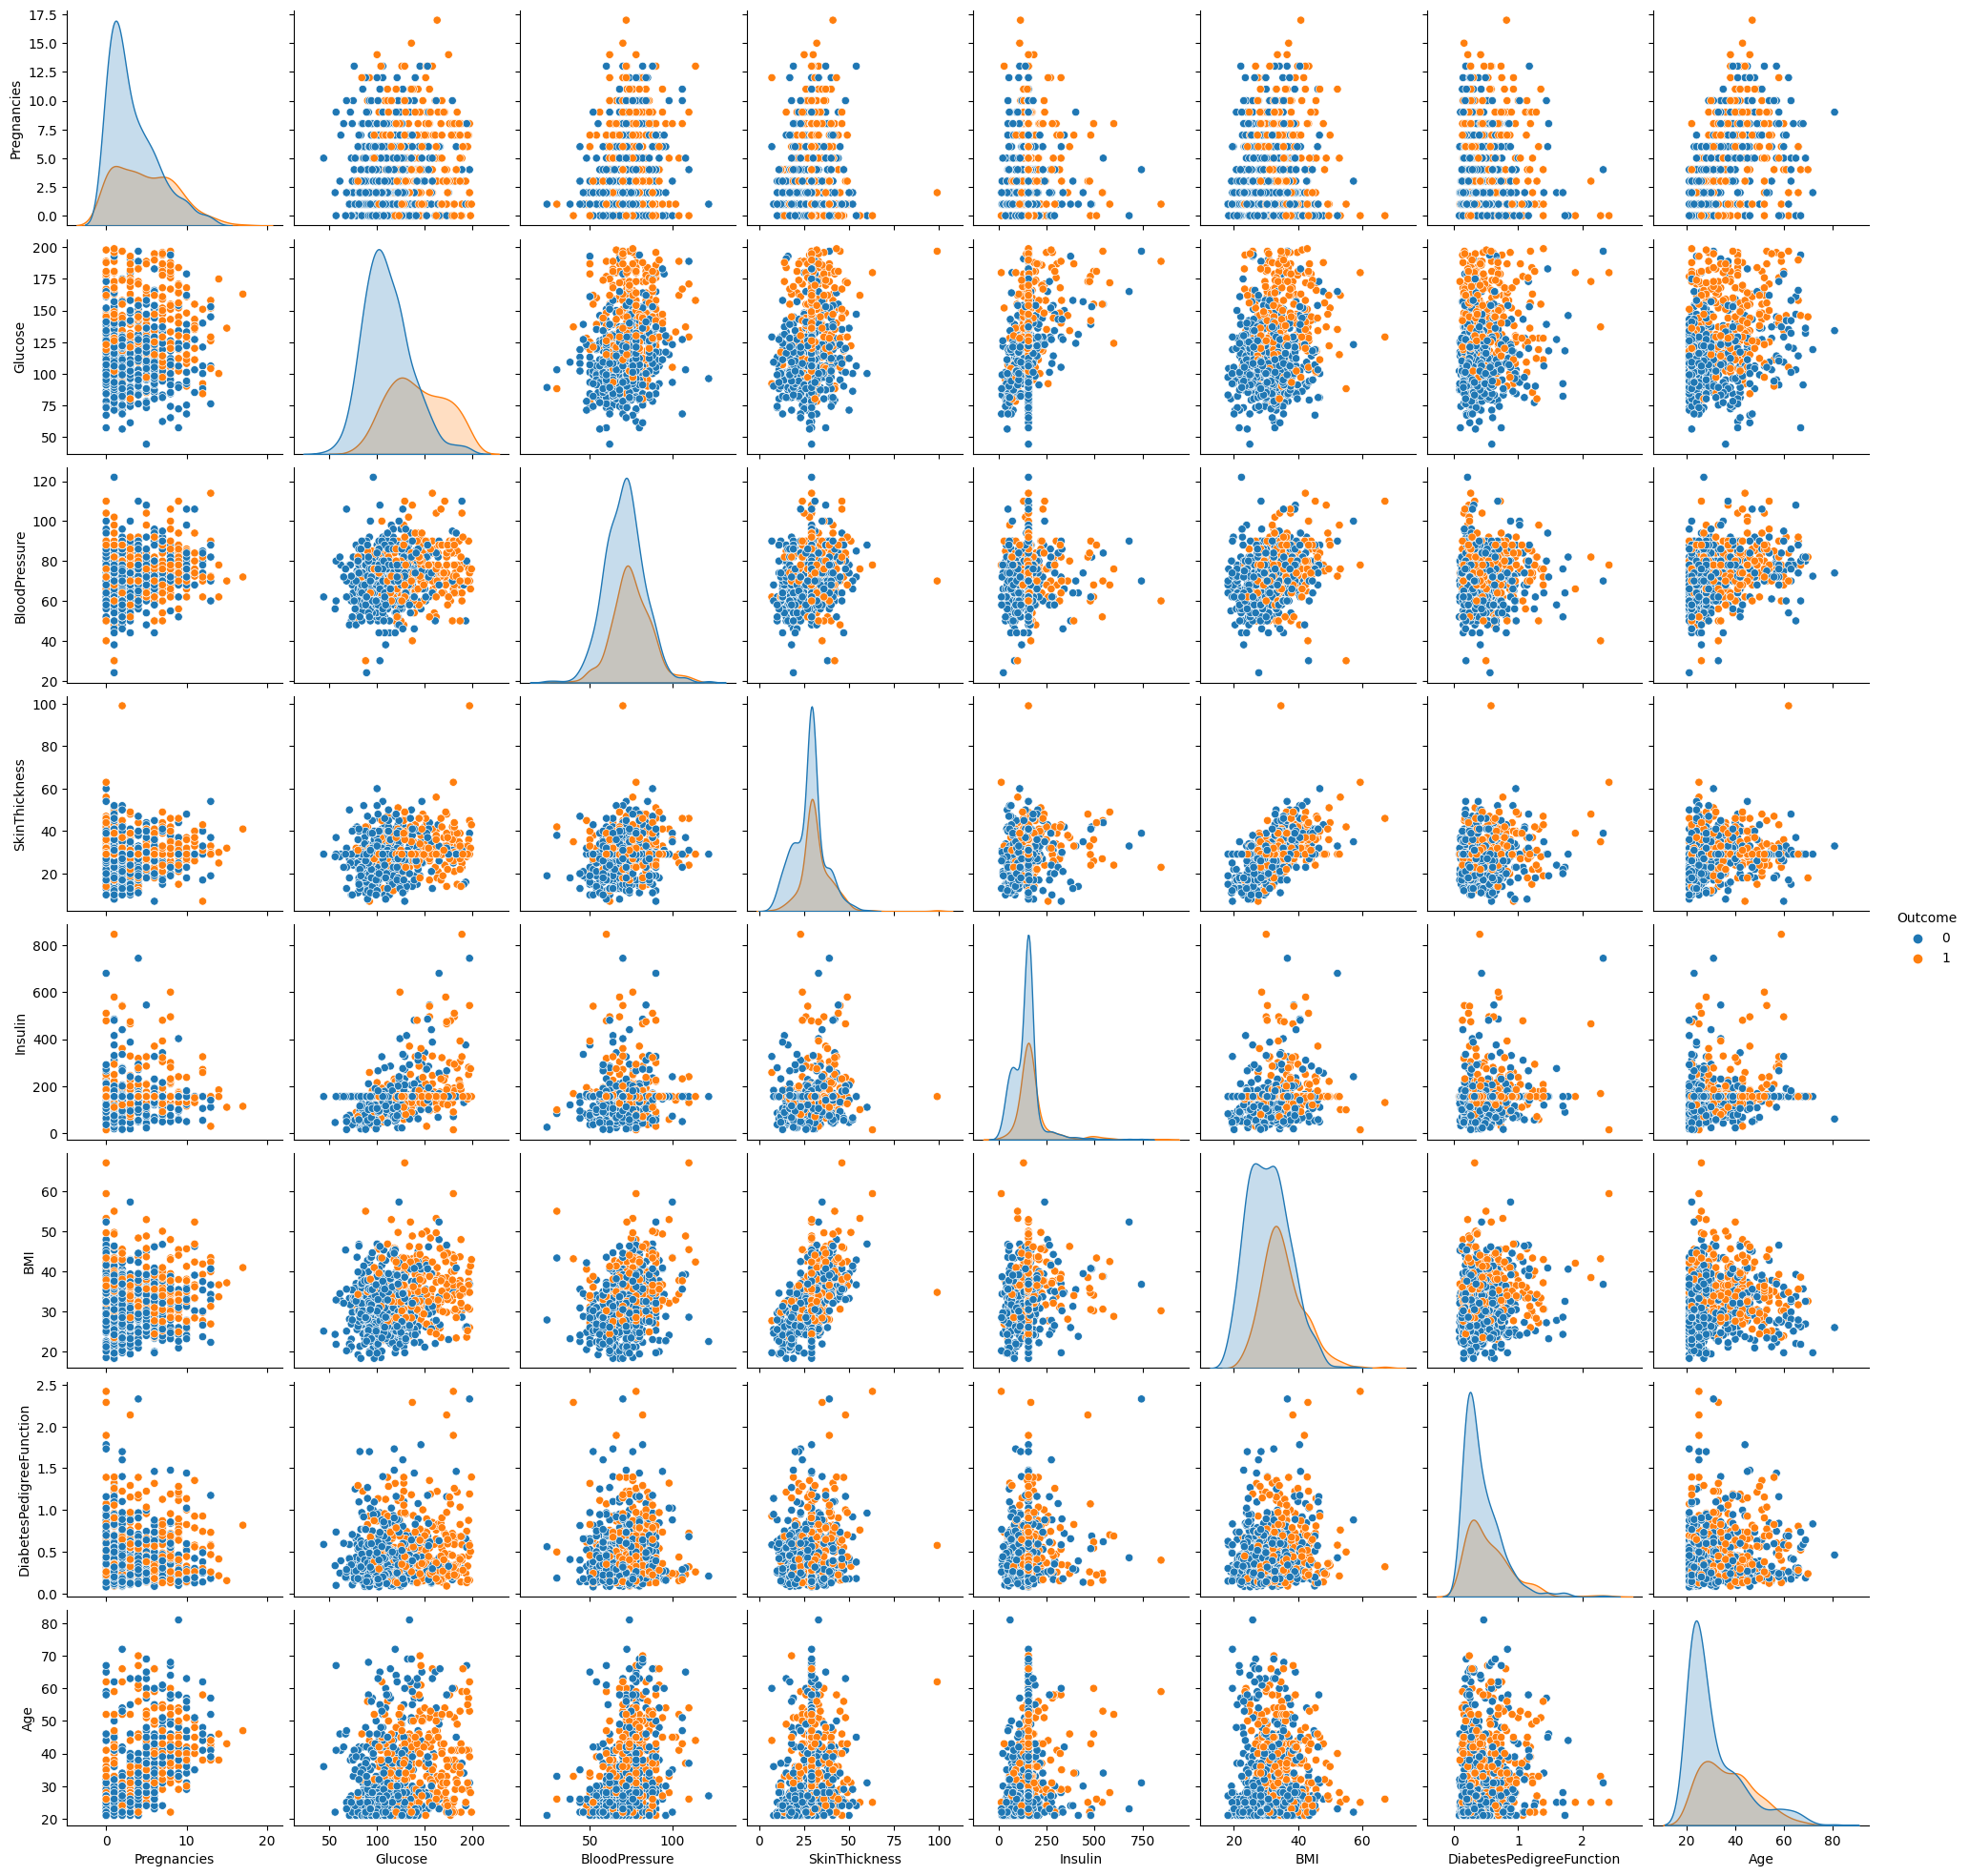

In [22]:
sns.pairplot(data, hue='Outcome')

## Test Basic Inference

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils.validation import column_or_1d
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
X = data.loc[:, data.columns != 'Outcome']
y = data.loc[:, data.columns == 'Outcome']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
logreg = LogisticRegression()

In [27]:
logreg = logreg.fit(X_train, column_or_1d(y_train))

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
y_pred = logreg.predict(X_test)

In [29]:
confusion_matrix(y_test, y_pred)

array([[123,  22],
       [ 37,  49]], dtype=int64)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       145
           1       0.69      0.57      0.62        86

    accuracy                           0.74       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.74      0.74      0.74       231



Try with non linear model

In [31]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-1,
hidden_layer_sizes=(5,), random_state=42)


clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [32]:
confusion_matrix(y_test, y_pred)

array([[119,  26],
       [ 45,  41]], dtype=int64)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       145
           1       0.61      0.48      0.54        86

    accuracy                           0.69       231
   macro avg       0.67      0.65      0.65       231
weighted avg       0.68      0.69      0.68       231



Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

C:\Users\zifen\AppData\Local\Temp\ipykernel_1856\1173158686.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


In [35]:
confusion_matrix(y_test, y_pred)

array([[127,  18],
       [ 54,  32]], dtype=int64)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78       145
           1       0.64      0.37      0.47        86

    accuracy                           0.69       231
   macro avg       0.67      0.62      0.62       231
weighted avg       0.68      0.69      0.66       231



In [37]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

c:\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
confusion_matrix(y_test, y_pred)

array([[113,  32],
       [ 43,  43]], dtype=int64)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       145
           1       0.57      0.50      0.53        86

    accuracy                           0.68       231
   macro avg       0.65      0.64      0.64       231
weighted avg       0.67      0.68      0.67       231



In [40]:

import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
xgb = GradientBoostingClassifier(learning_rate=0.02, n_estimators=600)

In [85]:
params = {
        'learning_rate': [0.01, 0.1, 1, 10],
        'n_estimators': [100, 200, 500, 1000],
        'subsample': [0.3, 0.6, 1],
        'min_samples_split': [2, 10, 40]
        }

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train, y_train), verbose=3, random_state=42 )


random_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


c:\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000002B487EB28C0>,
                   estimator=GradientBoostingClassifier(learning_rate=0.02,
                                                        n_estimators=600),
                   n_iter=5, n_jobs=4,
                   param_distributions={'learning_rate': [0.01, 0.1, 1, 10],
                                        'min_samples_split': [2, 10, 40],
                                        'n_estimators': [100, 200, 500, 1000],
                                        'subsample': [0.3, 0.6, 1]},
                   random_state=42, scoring='roc_auc', verbose=3)

In [86]:
y_pred = random_search.predict(X_test)

In [87]:
confusion_matrix(y_test, y_pred)

array([[119,  26],
       [ 43,  43]], dtype=int64)

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.82      0.78       145
           1       0.62      0.50      0.55        86

    accuracy                           0.70       231
   macro avg       0.68      0.66      0.67       231
weighted avg       0.69      0.70      0.69       231



In [ ]:

y_pred = random_search.predict(X_test)

In [51]:

from sklearn.experimental import enable_halving_search_cv

In [52]:
from sklearn.model_selection import HalvingGridSearchCV

In [82]:
params = {
        'learning_rate': [0.01, 0.1, 1, 10],
        'n_estimators': [100, 200, 500, 800, 1000],
        'subsample': [0.3, 0.6, 1],
        'min_samples_split': [2, 5, 10, 15, 40]
        }

# folds = 3
# param_comb = 5

# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)

# halving_search = HalvingGridSearchCV(xgb, param_grid=params, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train, y_train), verbose=3, random_state=42 )


# halving_search.fit(X, y)


folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train, y_train), verbose=3, random_state=42 )


random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000002B487EB2320>,
                   estimator=GradientBoostingClassifier(learning_rate=0.02,
                                                        n_estimators=600),
                   n_iter=5, n_jobs=4,
                   param_distributions={'learning_rate': [0.01, 0.1, 1, 10],
                                        'min_samples_split': [2, 5, 10, 15, 40],
                                        'n_estimators': [100, 200, 500, 800,
                                                         1000],
                                        'subsample': [0.3, 0.6, 1]},
                   random_state=42, scoring='roc_auc', verbose=3)

In [83]:
y_pred = random_search.predict(X_test)

In [84]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[115  30]
 [ 43  43]]
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       145
           1       0.59      0.50      0.54        86

    accuracy                           0.68       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.68      0.68      0.68       231



In [68]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()

In [79]:
params = {
        'hidden_layer_sizes': [(100,), (10, 10, 10), (50, 10), (50,), (20, 20)],
        'alpha': [0.0001, 0.001, 0.01, 1],
        'learning_rate_init': [0.001, 0.01],
        'random_state': [42],
        'verbose': [True],
        'early_stopping': [True],
        }


folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)

random_search = RandomizedSearchCV(clf, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train, y_train), verbose=3, random_state=42 )


random_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Iteration 1, loss = 9.39262431
Validation score: 0.462963
Iteration 2, loss = 5.31188997
Validation score: 0.574074
Iteration 3, loss = 3.00631006
Validation score: 0.574074
Iteration 4, loss = 3.12654198
Validation score: 0.574074
Iteration 5, loss = 3.77408982
Validation score: 0.611111
Iteration 6, loss = 3.86694399
Validation score: 0.592593
Iteration 7, loss = 3.53451142
Validation score: 0.592593
Iteration 8, loss = 3.01483633
Validation score: 0.685185
Iteration 9, loss = 2.53803984
Validation score: 0.703704
Iteration 10, loss = 2.37232442
Validation score: 0.666667
Iteration 11, loss = 2.39143302
Validation score: 0.611111
Iteration 12, loss = 2.39367086
Validation score: 0.666667
Iteration 13, loss = 2.28167005
Validation score: 0.703704
Iteration 14, loss = 2.19589166
Validation score: 0.722222
Iteration 15, loss = 2.14934458
Validation score: 0.740741
Iteration 16, loss = 2.17290232
Validation score: 0.740741
Itera

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000002B487EB27A0>,
                   estimator=MLPClassifier(), n_iter=5, n_jobs=4,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 1],
                                        'early_stopping': [True],
                                        'hidden_layer_sizes': [(100,),
                                                               (10, 10, 10),
                                                               (50, 10), (50,),
                                                               (20, 20)],
                                        'learning_rate_init': [0.001, 0.01],
                                        'random_state': [42],
                                        'verbose': [True]},
                   random_state=42, scoring='roc_auc', verbose=3)

In [80]:
y_pred = random_search.predict(X_test)

In [81]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[115  30]
 [ 47  39]]
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       145
           1       0.57      0.45      0.50        86

    accuracy                           0.67       231
   macro avg       0.64      0.62      0.63       231
weighted avg       0.66      0.67      0.66       231



PRETTY GOOD SO FAR WITHOUT HYPERPARAM TuNING !! :)